<a href="https://colab.research.google.com/github/TanushreeDattatreya/brain-tumor-detection/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 75 bytes


In [ ]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ayanzadeh93/color-classification

Dataset URL: https://www.kaggle.com/datasets/ayanzadeh93/color-classification
License(s): ODbL-1.0
 99% 160M/161M [00:00<00:00, 215MB/s]
100% 161M/161M [00:00<00:00, 214MB/s]


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
file_name = "/content/color-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

<ipython-input-6-94d634341189>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
DATADIR = '/content/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

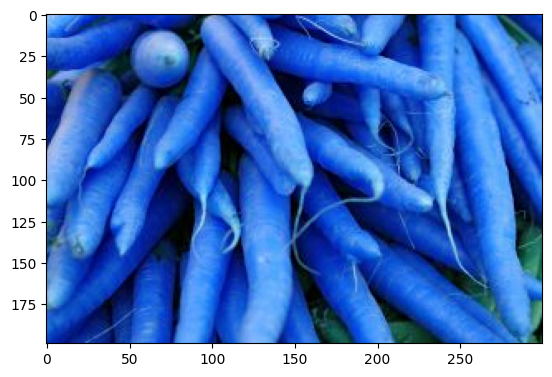

In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
print(len(training_data))

107


In [ ]:
lenofimage = len(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [ ]:
X.shape

(107, 30000)

In [ ]:
X = X/255.0

In [ ]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(107,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7777777777777778


In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.71      0.83      0.77         6
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         4
           6       0.60      0.75      0.67         4
           7       0.80      1.00      0.89         4

    accuracy                           0.78        27
   macro avg       0.85      0.78      0.78        27
weighted avg       0.82      0.78      0.77        27



In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,6,6
1,4,4
2,7,7
3,2,2
4,5,1
5,3,3
6,1,1
7,1,1
8,1,6
9,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[4 0 0 0 0 0 0 0]
 [0 2 0 0 0 1 0 2]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 5]]


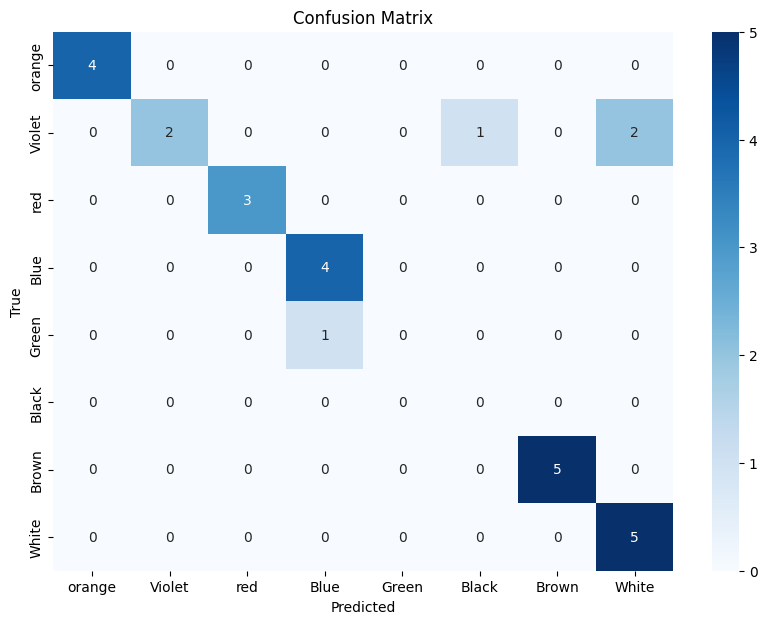

In [ ]:
# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Predict and evaluate
y_pred = svc.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on unknown data is", accuracy)


Accuracy on unknown data is 0.8518518518518519


In [ ]:
# Train the model
svc = SVC(kernel='linear', gamma='auto')
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on unknown data is", accuracy)


Accuracy on unknown data is 0.8518518518518519
